In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
deaths = pd.read_csv("avg_deaths.csv")

In [3]:
deaths     # 1st January to 15 December 2020

,Month,New_deaths
0,1,0
1,2,0
2,3,77
3,4,1844
4,5,1448
5,6,785
6,7,769
7,8,1020
8,9,739
9,10,751


In [4]:
import calendar

In [5]:
calendar.monthrange(2020, 1)

(2, 31)

In [6]:
_, num_days = calendar.monthrange(2020, 1)

In [7]:
num_days

31

In [8]:
deaths["num_days"] = 0

In [9]:
deaths

,Month,New_deaths,num_days
0,1,0,0
1,2,0,0
2,3,77,0
3,4,1844,0
4,5,1448,0
5,6,785,0
6,7,769,0
7,8,1020,0
8,9,739,0
9,10,751,0


In [10]:
deaths["year"] = 2020

In [11]:
deaths

,Month,New_deaths,num_days,year
0,1,0,0,2020
1,2,0,0,2020
2,3,77,0,2020
3,4,1844,0,2020
4,5,1448,0,2020
5,6,785,0,2020
6,7,769,0,2020
7,8,1020,0,2020
8,9,739,0,2020
9,10,751,0,2020


In [12]:
deaths

,Month,New_deaths,num_days,year
0,1,0,0,2020
1,2,0,0,2020
2,3,77,0,2020
3,4,1844,0,2020
4,5,1448,0,2020
5,6,785,0,2020
6,7,769,0,2020
7,8,1020,0,2020
8,9,739,0,2020
9,10,751,0,2020


In [13]:
deaths.columns

Index(['Month', 'New_deaths', 'num_days', 'year'], dtype='object')

In [14]:
deaths = deaths[["year", "Month", "num_days", "New_deaths"]]
deaths

,year,Month,num_days,New_deaths
0,2020,1,0,0
1,2020,2,0,0
2,2020,3,0,77
3,2020,4,0,1844
4,2020,5,0,1448
5,2020,6,0,785
6,2020,7,0,769
7,2020,8,0,1020
8,2020,9,0,739
9,2020,10,0,751


In [15]:
def days(year, month):
    _, num_days = calendar.monthrange(year, month)
    return num_days

In [16]:
deaths.iloc[0]  # first row

year          2020
Month            1
num_days         0
New_deaths       0
Name: 0, dtype: int64

In [17]:
deaths.iloc[0]["year"]

2020

In [18]:
deaths.iloc[0]["Month"]

1

In [19]:
deaths.columns

Index(['year', 'Month', 'num_days', 'New_deaths'], dtype='object')

In [20]:
deaths[["year", "Month"]].apply(lambda row: days(row["year"], row["Month"]), axis = 1)

0     31
1     29
2     31
3     30
4     31
5     30
6     31
7     31
8     30
9     31
10    30
11    31
dtype: int32

In [21]:
days = (deaths[["year", "Month"]]).apply(lambda row: days(row["year"], row["Month"]), axis = 1)

In [22]:
days

0     31
1     29
2     31
3     30
4     31
5     30
6     31
7     31
8     30
9     31
10    30
11    31
dtype: int32

In [23]:
deaths.num_days = days

In [24]:
deaths

,year,Month,num_days,New_deaths
0,2020,1,31,0
1,2020,2,29,0
2,2020,3,31,77
3,2020,4,30,1844
4,2020,5,31,1448
5,2020,6,30,785
6,2020,7,31,769
7,2020,8,31,1020
8,2020,9,30,739
9,2020,10,31,751


In [25]:
deaths["Monthly_deaths"] = deaths.num_days.mul(deaths.New_deaths)  # num_days*New_deaths

In [26]:
deaths

,year,Month,num_days,New_deaths,Monthly_deaths
0,2020,1,31,0,0
1,2020,2,29,0,0
2,2020,3,31,77,2387
3,2020,4,30,1844,55320
4,2020,5,31,1448,44888
5,2020,6,30,785,23550
6,2020,7,31,769,23839
7,2020,8,31,1020,31620
8,2020,9,30,739,22170
9,2020,10,31,751,23281


In [27]:
deaths.rename({"New_deaths": "Avg_deaths", "year": "Year", "num_days": "Num_of_days"}, axis = 1, inplace = True)

In [28]:
deaths

,Year,Month,Num_of_days,Avg_deaths,Monthly_deaths
0,2020,1,31,0,0
1,2020,2,29,0,0
2,2020,3,31,77,2387
3,2020,4,30,1844,55320
4,2020,5,31,1448,44888
5,2020,6,30,785,23550
6,2020,7,31,769,23839
7,2020,8,31,1020,31620
8,2020,9,30,739,22170
9,2020,10,31,751,23281


In [29]:
deaths["Cum_deaths"] = deaths.Monthly_deaths.cumsum()  # cumulative sum

In [30]:
deaths

,Year,Month,Num_of_days,Avg_deaths,Monthly_deaths,Cum_deaths
0,2020,1,31,0,0,0
1,2020,2,29,0,0,0
2,2020,3,31,77,2387,2387
3,2020,4,30,1844,55320,57707
4,2020,5,31,1448,44888,102595
5,2020,6,30,785,23550,126145
6,2020,7,31,769,23839,149984
7,2020,8,31,1020,31620,181604
8,2020,9,30,739,22170,203774
9,2020,10,31,751,23281,227055


In [31]:
2/2

1.0

In [32]:
2//2

1

In [33]:
a = 7

a +=2
a

9

In [34]:
deaths.loc[11,"Num_of_days"] //= 2

# deaths.loc[11,"Num_of_days"] //= 15

In [35]:
deaths

,Year,Month,Num_of_days,Avg_deaths,Monthly_deaths,Cum_deaths
0,2020,1,31,0,0,0
1,2020,2,29,0,0,0
2,2020,3,31,77,2387,2387
3,2020,4,30,1844,55320,57707
4,2020,5,31,1448,44888,102595
5,2020,6,30,785,23550,126145
6,2020,7,31,769,23839,149984
7,2020,8,31,1020,31620,181604
8,2020,9,30,739,22170,203774
9,2020,10,31,751,23281,227055


In [36]:
deaths["Monthly_deaths"] = deaths.Num_of_days.mul(deaths.Avg_deaths)  # num_days*New_deaths
deaths["Cum_deaths"] = deaths.Monthly_deaths.cumsum()
deaths

,Year,Month,Num_of_days,Avg_deaths,Monthly_deaths,Cum_deaths
0,2020,1,31,0,0,0
1,2020,2,29,0,0,0
2,2020,3,31,77,2387,2387
3,2020,4,30,1844,55320,57707
4,2020,5,31,1448,44888,102595
5,2020,6,30,785,23550,126145
6,2020,7,31,769,23839,149984
7,2020,8,31,1020,31620,181604
8,2020,9,30,739,22170,203774
9,2020,10,31,751,23281,227055


# STORY TELLING

In [37]:
# Jan - March  --> 3
# March - June --> 3 - 6
# June - Oct   --> 6 - 10
# Oct - Dec    --> 10 - 12

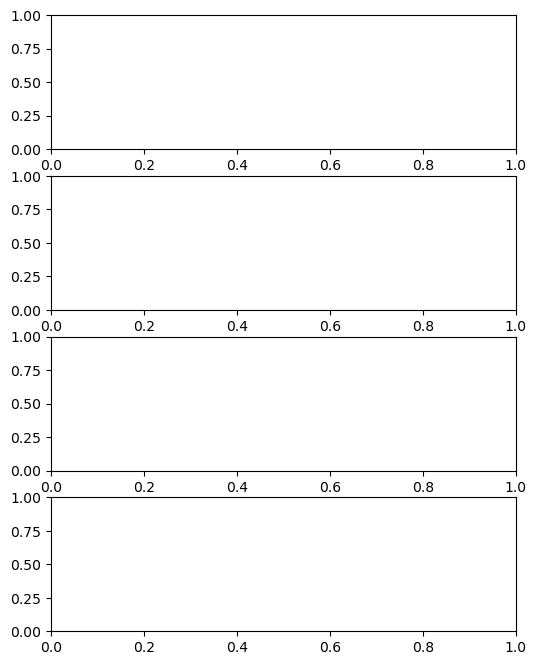

In [38]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6, 8))

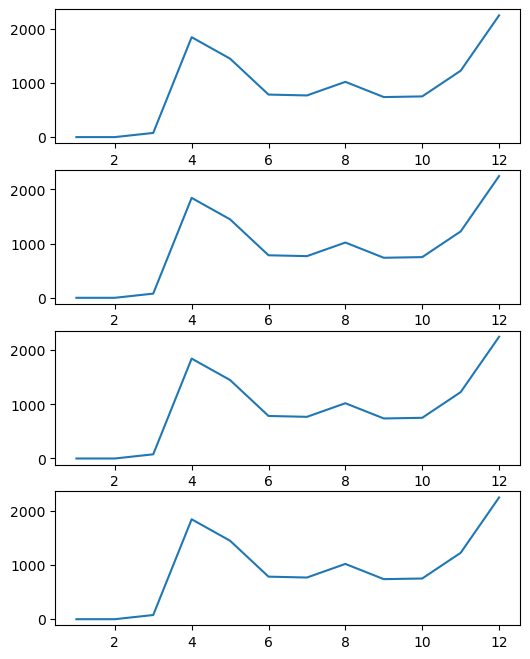

In [39]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6, 8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"])
plt.show()    

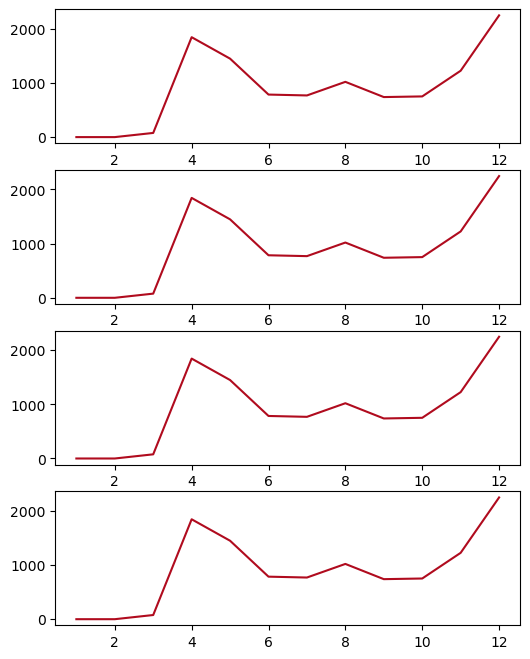

In [40]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6, 8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e")
plt.show()    

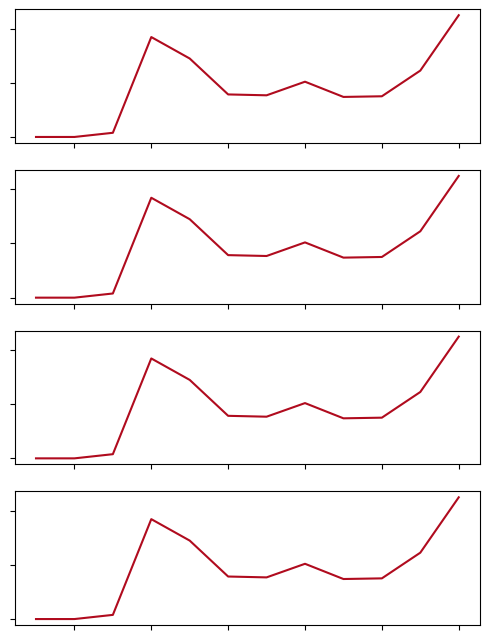

In [41]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6, 8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
plt.show()    

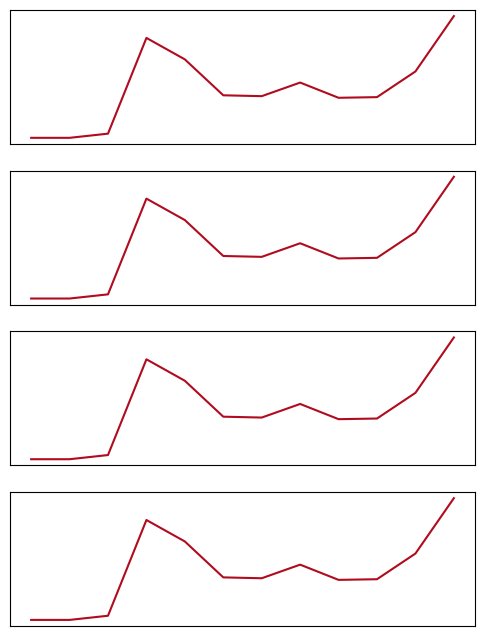

In [42]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6, 8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e")
    ax.set_xticklabels([])  # Data Ink, Element
    ax.set_yticklabels([])  # Data Ink, Element
    ax.tick_params(bottom = False, left = False) # Non-data Ink --> removing structural element
plt.show()    

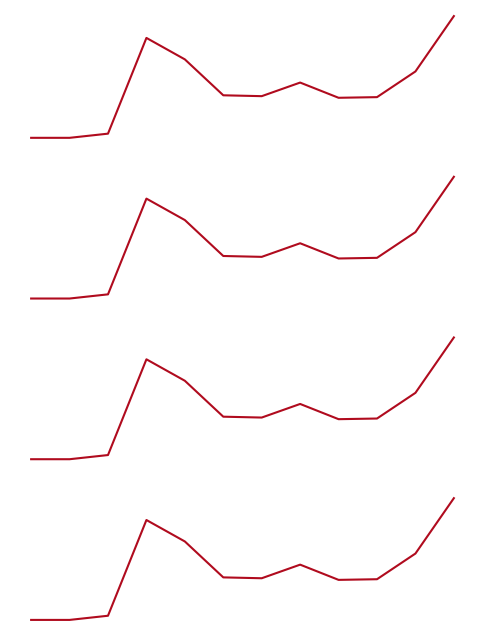

In [43]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6, 8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e")
    ax.set_xticklabels([]) 
    ax.set_yticklabels([])  
    ax.tick_params(bottom = False, left = False) 
#   ax.spines["left"].set_visible(False)
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)  # Non-data Ink --> removing structural element
        
plt.show()    

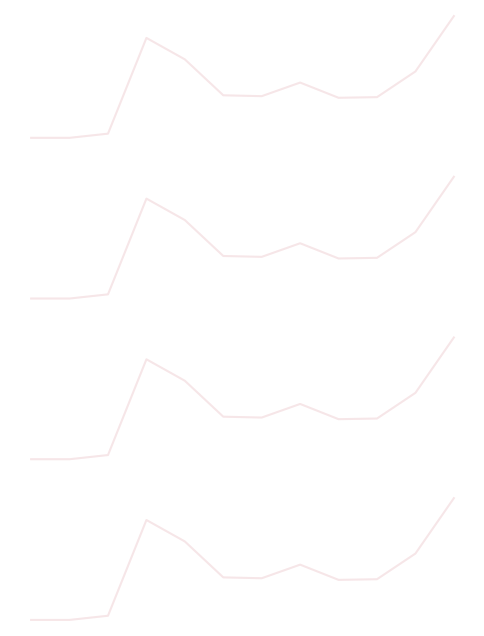

In [44]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6, 8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1) 
    ax.set_xticklabels([]) 
    ax.set_yticklabels([])  
    ax.tick_params(bottom = False, left = False) 
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)  # Non-data Ink --> removing structural element
        
plt.show()    

* **Slicing works on rows, by default.**

In [45]:
deaths[:3]

,Year,Month,Num_of_days,Avg_deaths,Monthly_deaths,Cum_deaths
0,2020,1,31,0,0,0
1,2020,2,29,0,0,0
2,2020,3,31,77,2387,2387


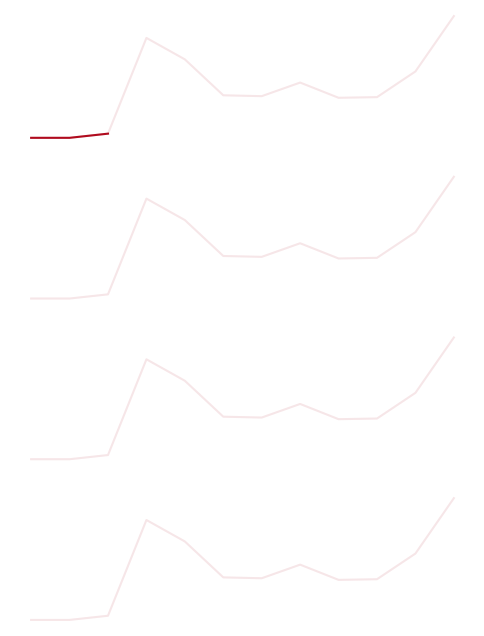

In [46]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6, 8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1) 
    ax.set_xticklabels([]) 
    ax.set_yticklabels([])  
    ax.tick_params(bottom = False, left = False) 
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)  # Non-data Ink --> removing structural element
        
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e")        
        
plt.show()    

In [52]:
deaths[2:6]

,Year,Month,Num_of_days,Avg_deaths,Monthly_deaths,Cum_deaths
2,2020,3,31,77,2387,2387
3,2020,4,30,1844,55320,57707
4,2020,5,31,1448,44888,102595
5,2020,6,30,785,23550,126145


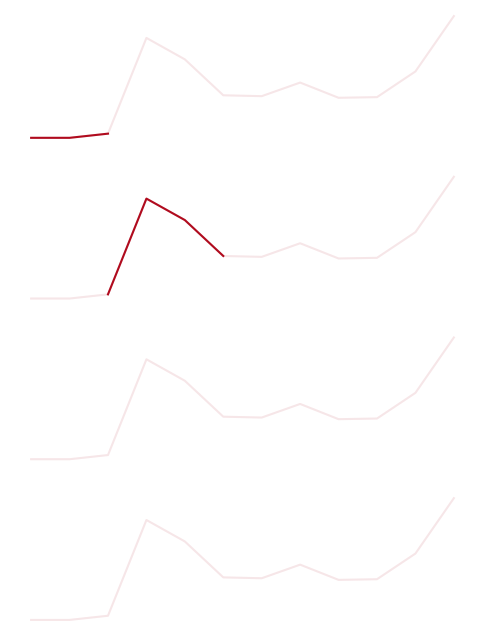

In [53]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6, 8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1) 
    ax.set_xticklabels([]) 
    ax.set_yticklabels([])  
    ax.tick_params(bottom = False, left = False) 
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)  # Non-data Ink --> removing structural element
        
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e")        
ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e")

plt.show()    

In [49]:
deaths[5:11]

,Year,Month,Num_of_days,Avg_deaths,Monthly_deaths,Cum_deaths
5,2020,6,30,785,23550,126145
6,2020,7,31,769,23839,149984
7,2020,8,31,1020,31620,181604
8,2020,9,30,739,22170,203774
9,2020,10,31,751,23281,227055
10,2020,11,30,1225,36750,263805


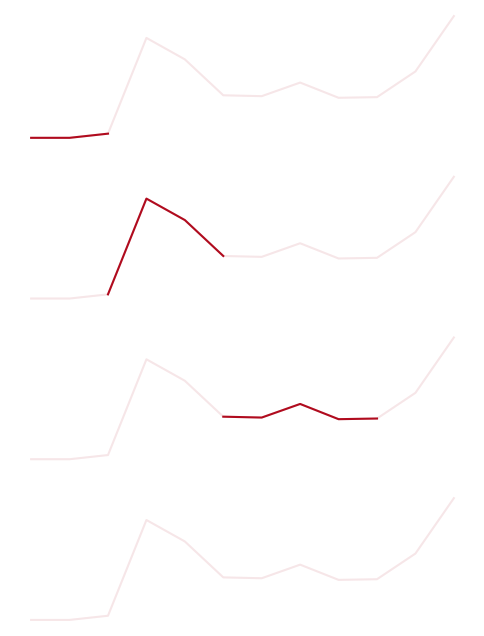

In [57]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6, 8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1) 
    ax.set_xticklabels([]) 
    ax.set_yticklabels([])  
    ax.tick_params(bottom = False, left = False) 
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)  # Non-data Ink --> removing structural element
        
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e")        
ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e")
ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e")

plt.show()

In [56]:
deaths[9:]

,Year,Month,Num_of_days,Avg_deaths,Monthly_deaths,Cum_deaths
9,2020,10,31,751,23281,227055
10,2020,11,30,1225,36750,263805
11,2020,12,15,2247,33705,297510


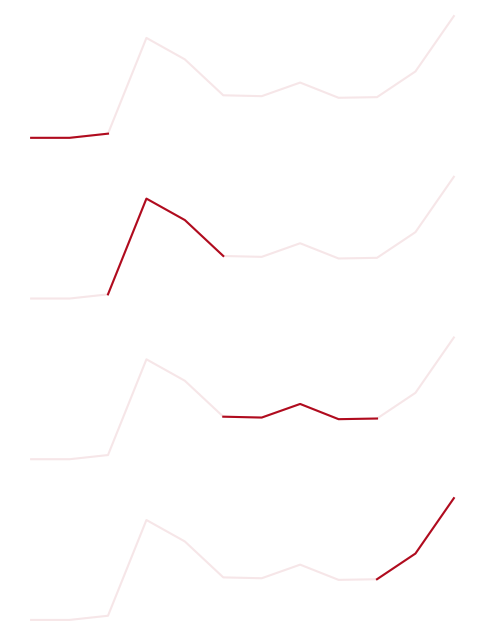

In [58]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6, 8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1) 
    ax.set_xticklabels([]) 
    ax.set_yticklabels([])  
    ax.tick_params(bottom = False, left = False) 
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)  # Non-data Ink --> removing structural element
        
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e")        
ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e")
ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e")
ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e")

plt.show()

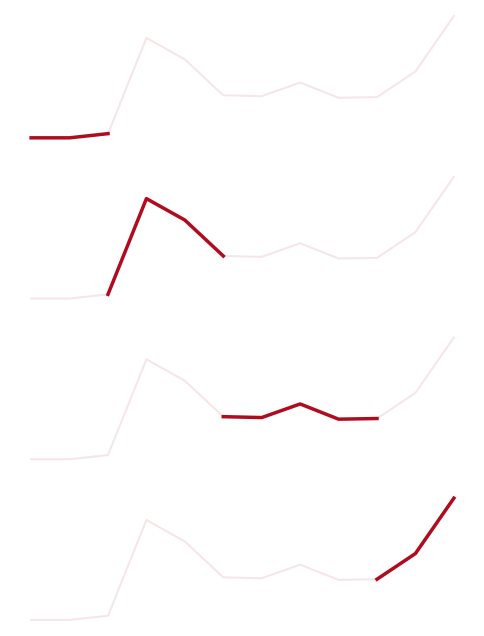

In [59]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6, 8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1) 
    ax.set_xticklabels([]) 
    ax.set_yticklabels([])  
    ax.tick_params(bottom = False, left = False) 
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)  # Non-data Ink --> removing structural element
        
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e", linewidth = 2.5)        
ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e", linewidth = 2.5)
ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e", linewidth = 2.5)
ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e", linewidth = 2.5)

plt.show()

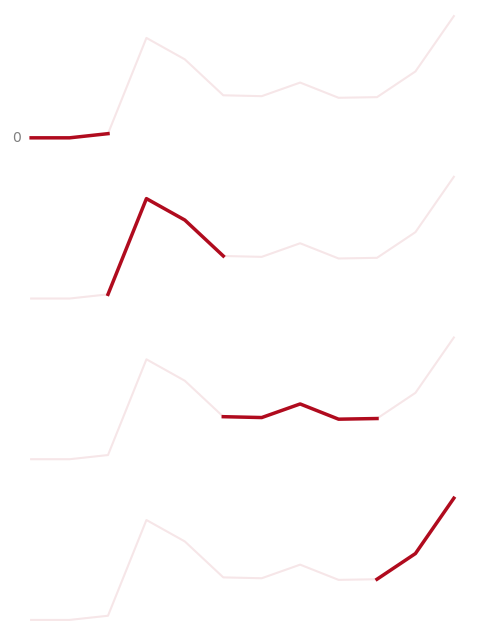

In [64]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6, 8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1) 
    ax.set_xticklabels([]) 
    ax.set_yticklabels([])  
    ax.tick_params(bottom = False, left = False) 
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)  # Non-data Ink --> removing structural element
        
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e", linewidth = 2.5) 
ax1.text(x = 0.5, y = -80, s = "0", alpha = 0.5)


ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e", linewidth = 2.5)
ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e", linewidth = 2.5)
ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e", linewidth = 2.5)

plt.show()

In [65]:
deaths["Avg_deaths"][2:6]

2      77
3    1844
4    1448
5     785
Name: Avg_deaths, dtype: int64

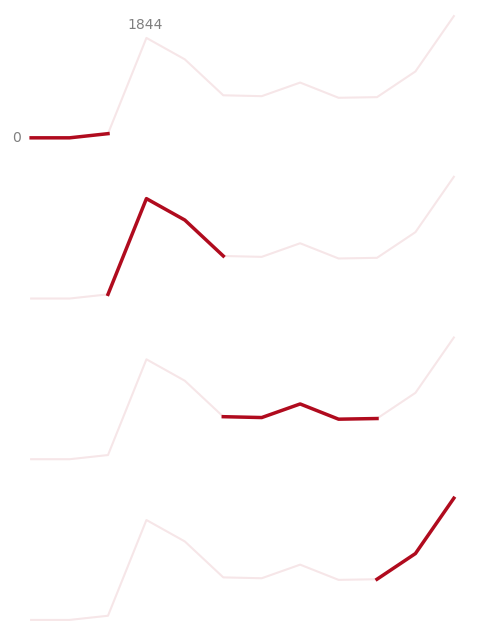

In [71]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6, 8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1) 
    ax.set_xticklabels([]) 
    ax.set_yticklabels([])  
    ax.tick_params(bottom = False, left = False) 
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)  # Non-data Ink --> removing structural element
        
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e", linewidth = 2.5) 
ax1.text(x = 0.5, y = -80, s = "0", alpha = 0.5)
ax1.text(x = 3.5, y = 2000, s = "1844", alpha = 0.5)

ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e", linewidth = 2.5)
ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e", linewidth = 2.5)
ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e", linewidth = 2.5)

plt.show()

In [73]:
deaths

,Year,Month,Num_of_days,Avg_deaths,Monthly_deaths,Cum_deaths
0,2020,1,31,0,0,0
1,2020,2,29,0,0,0
2,2020,3,31,77,2387,2387
3,2020,4,30,1844,55320,57707
4,2020,5,31,1448,44888,102595
5,2020,6,30,785,23550,126145
6,2020,7,31,769,23839,149984
7,2020,8,31,1020,31620,181604
8,2020,9,30,739,22170,203774
9,2020,10,31,751,23281,227055


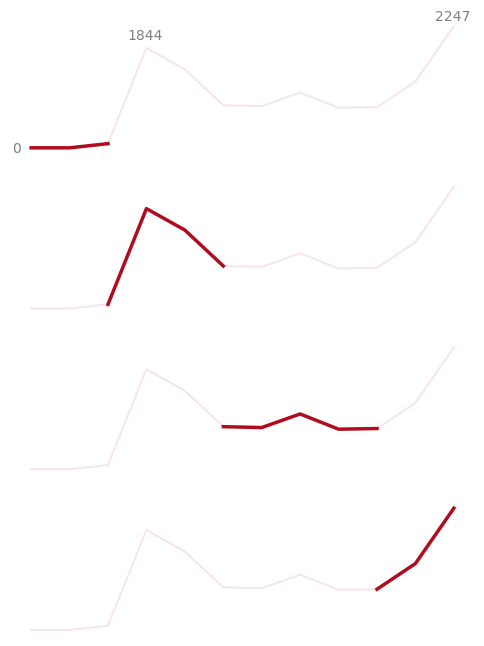

In [76]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6, 8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1) 
    ax.set_xticklabels([]) 
    ax.set_yticklabels([])  
    ax.tick_params(bottom = False, left = False) 
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)  # Non-data Ink --> removing structural element
        
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e", linewidth = 2.5) 
ax1.text(x = 0.5, y = -80, s = "0", alpha = 0.5)
ax1.text(x = 3.5, y = 2000, s = "1844", alpha = 0.5)
ax1.text(x = 11.5, y = 2350, s = "2247", alpha = 0.5)

ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e", linewidth = 2.5)
ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e", linewidth = 2.5)
ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e", linewidth = 2.5)

plt.show()

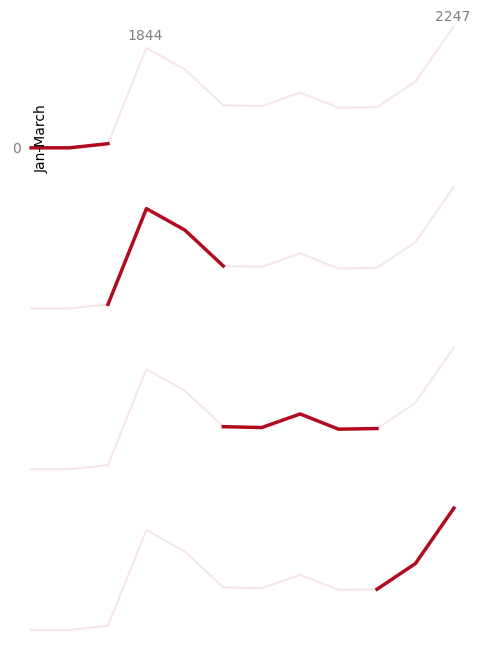

In [83]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6, 8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1) 
    ax.set_xticklabels([]) 
    ax.set_yticklabels([])  
    ax.tick_params(bottom = False, left = False) 
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)  # Non-data Ink --> removing structural element
        
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e", linewidth = 2.5) 
ax1.text(x = 0.5, y = -80, s = "0", alpha = 0.5)
ax1.text(x = 3.5, y = 2000, s = "1844", alpha = 0.5)
ax1.text(x = 11.5, y = 2350, s = "2247", alpha = 0.5)
ax1.text(x = 1.1, y = -400, s = "Jan-March", rotation = 90)

ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e", linewidth = 2.5)
ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e", linewidth = 2.5)
ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e", linewidth = 2.5)

plt.show()

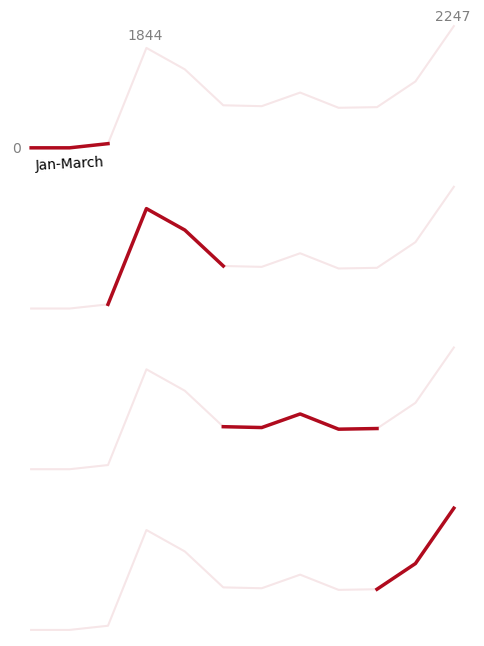

In [84]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6, 8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1) 
    ax.set_xticklabels([]) 
    ax.set_yticklabels([])  
    ax.tick_params(bottom = False, left = False) 
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)  # Non-data Ink --> removing structural element
        
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e", linewidth = 2.5) 
ax1.text(x = 0.5, y = -80, s = "0", alpha = 0.5)
ax1.text(x = 3.5, y = 2000, s = "1844", alpha = 0.5)
ax1.text(x = 11.5, y = 2350, s = "2247", alpha = 0.5)
ax1.text(x = 1.1, y = -400, s = "Jan-March", rotation = 3)

ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e", linewidth = 2.5)
ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e", linewidth = 2.5)
ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e", linewidth = 2.5)

plt.show()

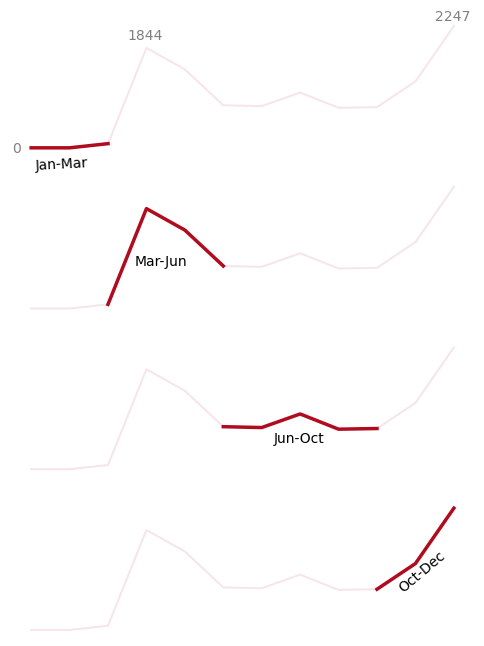

In [128]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6, 8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1) 
    ax.set_xticklabels([]) 
    ax.set_yticklabels([])  
    ax.tick_params(bottom = False, left = False) 
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)  # Non-data Ink --> removing structural element
        
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e", linewidth = 2.5) 
ax1.text(x = 0.5, y = -80, s = "0", alpha = 0.5)
ax1.text(x = 3.5, y = 2000, s = "1844", alpha = 0.5)
ax1.text(x = 11.5, y = 2350, s = "2247", alpha = 0.5)
ax1.text(x = 1.1, y = -400, s = "Jan-Mar", rotation = 3)


ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e", linewidth = 2.5)
ax2.text(x = 3.7, y = 800, s = "Mar-Jun",)

ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e", linewidth = 2.5)
ax3.text(x = 7.3, y = 485, s = "Jun-Oct",)

ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e", linewidth = 2.5)
ax4.text(x = 10.5, y = 700, s = "Oct-Dec",rotation = 40)

plt.show()

In [129]:
deaths["Avg_deaths"].mean()

908.75

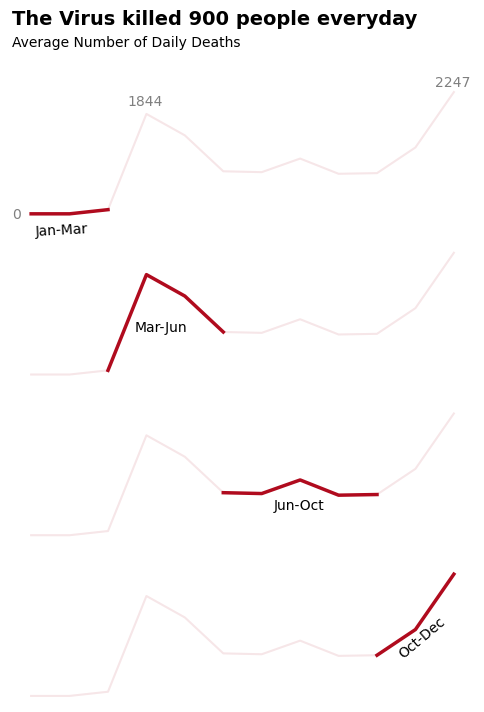

In [140]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6, 8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1) 
    ax.set_xticklabels([]) 
    ax.set_yticklabels([])  
    ax.tick_params(bottom = False, left = False) 
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)  # Non-data Ink --> removing structural element
        
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e", linewidth = 2.5) 
ax1.text(x = 0.5, y = -80, s = "0", alpha = 0.5)
ax1.text(x = 3.5, y = 2000, s = "1844", alpha = 0.5)
ax1.text(x = 11.5, y = 2350, s = "2247", alpha = 0.5)
ax1.text(x = 1.1, y = -400, s = "Jan-Mar", rotation = 3)
ax1.text(0.5, 3500, "The Virus killed 900 people everyday", size = 14, weight = "bold")
ax1.text(0.5, 3100, "Average Number of Daily Deaths", size = 10)

ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e", linewidth = 2.5)
ax2.text(x = 3.7, y = 800, s = "Mar-Jun",)

ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e", linewidth = 2.5)
ax3.text(x = 7.3, y = 485, s = "Jun-Oct",)

ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e", linewidth = 2.5)
ax4.text(x = 10.5, y = 700, s = "Oct-Dec",rotation = 40)

plt.show()

In [141]:
deaths

,Year,Month,Num_of_days,Avg_deaths,Monthly_deaths,Cum_deaths
0,2020,1,31,0,0,0
1,2020,2,29,0,0,0
2,2020,3,31,77,2387,2387
3,2020,4,30,1844,55320,57707
4,2020,5,31,1448,44888,102595
5,2020,6,30,785,23550,126145
6,2020,7,31,769,23839,149984
7,2020,8,31,1020,31620,181604
8,2020,9,30,739,22170,203774
9,2020,10,31,751,23281,227055


In [144]:
cum_cases = (deaths.loc[2, "Cum_deaths"], deaths.loc[5, "Cum_deaths"], deaths.loc[9, "Cum_deaths"], deaths.loc[11, "Cum_deaths"])

cum_cases

(2387, 126145, 227055, 297510)

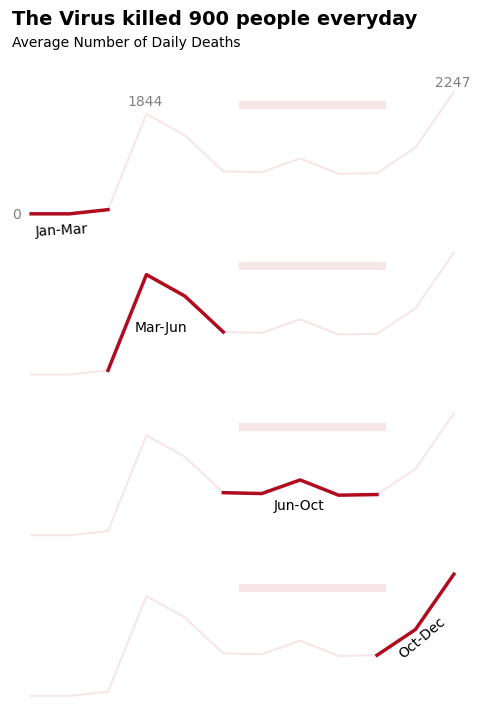

In [147]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1, figsize = (6, 8))

axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.plot(deaths["Month"], deaths["Avg_deaths"], color = "#b00b1e", alpha = 0.1) 
    ax.set_xticklabels([]) 
    ax.set_yticklabels([])  
    ax.tick_params(bottom = False, left = False) 
    for spine in ax.spines:
        ax.spines[spine].set_visible(False) 
        
ax1.plot(deaths["Month"][:3], deaths["Avg_deaths"][:3], color = "#b00b1e", linewidth = 2.5) 
ax1.text(x = 0.5, y = -80, s = "0", alpha = 0.5)
ax1.text(x = 3.5, y = 2000, s = "1844", alpha = 0.5)
ax1.text(x = 11.5, y = 2350, s = "2247", alpha = 0.5)
ax1.text(x = 1.1, y = -400, s = "Jan-Mar", rotation = 3)
ax1.text(0.5, 3500, "The Virus killed 900 people everyday", size = 14, weight = "bold")
ax1.text(0.5, 3100, "Average Number of Daily Deaths", size = 10)

ax2.plot(deaths["Month"][2:6], deaths["Avg_deaths"][2:6], color = "#b00b1e", linewidth = 2.5)
ax2.text(x = 3.7, y = 800, s = "Mar-Jun",)

ax3.plot(deaths["Month"][5:10], deaths["Avg_deaths"][5:10], color = "#b00b1e", linewidth = 2.5)
ax3.text(x = 7.3, y = 485, s = "Jun-Oct",)

ax4.plot(deaths["Month"][9:], deaths["Avg_deaths"][9:], color = "#b00b1e", linewidth = 2.5)
ax4.text(x = 10.5, y = 700, s = "Oct-Dec",rotation = 40)

# making progress bar

for ax in axes:
    ax.axhline(y = 2000, xmin = 0.5, xmax = 0.8, c = "#b00b1e", linewidth = 6, alpha = 0.1)  # y = height where the 
                                                                                             # line will be placed

plt.show()

# the total length of the bar is 1 which occupies the whole graph so we took xmin = 0.5 and xmax = 0.8 as length

In [148]:
#### list comprehension ####

proportions = [(i/cum_cases[-1]) for i in cum_cases]
proportions

[0.008023259722362274, 0.42400255453598196, 0.7631844307754361, 1.0]

In [149]:
proportions = [round(i/cum_cases[-1]) for i in cum_cases]
proportions

[0, 0, 1, 1]

In [152]:
proportions = [round(i/cum_cases[-1], 2) for i in cum_cases]
proportions

[0.01, 0.42, 0.76, 1.0]

In [155]:
proportions = []

for i in cum_cases:
    print(i/297510)

0.008023259722362274
0.42400255453598196
0.7631844307754361
1.0


In [156]:
proportions = []

for i in cum_cases:
    v = i/297510
    print(v)

0.008023259722362274
0.42400255453598196
0.7631844307754361
1.0


In [157]:
proportions = []

for i in cum_cases:
    v = i/297510
    final = round(v, 2) # till 2 decimal places
    print(final)

0.01
0.42
0.76
1.0


In [158]:
proportions = []

for i in cum_cases:
    v = i/297510
    final = round(v, 2) # till 2 decimal places
#     print(final)
    proportions.append(final)

In [159]:
proportions

[0.01, 0.42, 0.76, 1.0]

In [163]:
xmaxs = [0.5 + i * (0.8 - 0.5) for i in proportions]

In [164]:
xmaxs

[0.503, 0.626, 0.728, 0.8]